# Criando Graficos com Matplotlib e SQLite

In [1]:
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
conn = sqlite3.connect('dsa.db')

c = conn.cursor()

def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
def data_insert():
    c.execute("INSERT INTO produtos VALUES(now, 'Teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor > 80.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()
    
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
    plt.bar(ids, valores)
    plt.show()
    

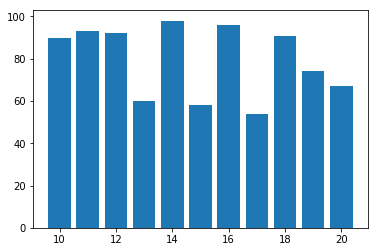

In [3]:
dados_grafico()